# <span style="color:rgb(160,0,86)">Modelle für zufällige Ereignisse mit Python</span>

***

## <span style="color:rgb(160,0,86)">Lernziele</span>

- Sie wissen was eine **Zufallsvariable** ist und verstehen den Unterschied zwischen der **Wahrscheinlichkeitsverteilung** und der Häufigkeitsverteilung.
- Sie kennen das Python Module *scipy*.
- Sie können den **Erwartungswert** und die **Standardabweichung** einer Zufallsvariablen mit Python berechnen.
- Sie können mit Hilfe der kumulativen Wahrscheinlichkeitsverteilung mit Python **Wahrscheinlichkeiten** berechnen.  
- Sie kennen die wichtigsten **diskreten** und **stetigen** Verteilungen.  

***

### <span style="color:rgb(160,0,86)">Warum brauchen wir in der Statistik mathematische Modell für Zufall?</span>

**Daten** und **Zufallsprozesse** sind eng miteinander verbunden, weil Daten oft als Beobachtungen von zufälligen Vorgängen betrachtet werden.    
- Ein **Zufallsvariable** $X$ beschreibt die möglichen Werte eines Zufallsexperiments (z.B. die Körpergrösse einer zufällig gewählten Person). Wenn wir Messungen durchführen, erhalten wir konkrete Werte $x$, die als Realisierungen der Zufallsvariable $X$ gelten.
- Die zugrunde liegende **Wahrscheinlichkeitsverteilung** einer Zufallsvariablen hilft, die Struktur der Daten zu verstehen. Statistische Modelle nutzen diese Verteilungen, um Vorhersagen oder Schlussfolgerungen zu ermöglichen.
- Aus Stichprobendaten werden Parameter geschätzt, um Rückschlüsse auf die zugrunde liegende Zufallsvariable und deren Verteilung zu ziehen.

Zusammenfassend sind Zufallsvariablen mathematische Modelle für die Prozesse, die Daten erzeugen. Daten wiederum liefern beobachtbare Werte, die helfen, die zugrunde liegenden Wahrscheinlichkeitsverteilungen zu verstehen und in der Statistik zu nutzen.

#### <span style="color:rgb(160,0,86)">Beispiele:</span>

Wenn wir **mehrmals einen Würfel werfen**, erzeugen wir Daten. Wir können zählen, wie oft jede Zahl erscheint und die relative Häufigkeit für jede Zahl bestimmen:


In [121]:
from random import randint

[randint(1,6) for _ in range(20)]

[1, 1, 1, 3, 1, 5, 1, 1, 4, 6, 4, 5, 5, 3, 4, 3, 4, 3, 5, 4]

In [128]:
import numpy as np

anzWürfe = 1000000
würfe = np.array([randint(1,6) for _ in range(anzWürfe)])
werte, absH = np.unique(würfe,return_counts=True)
relH = absH/anzWürfe
for i in werte:
    print("relative Häufigkeit der Augenzahl",i,":",relH[i-1])


relative Häufigkeit der Augenzahl 1 : 0.166224
relative Häufigkeit der Augenzahl 2 : 0.166214
relative Häufigkeit der Augenzahl 3 : 0.167592
relative Häufigkeit der Augenzahl 4 : 0.166834
relative Häufigkeit der Augenzahl 5 : 0.166188
relative Häufigkeit der Augenzahl 6 : 0.166948


Wenn wir davon ausgehen, dass wir einen **fairen Würfel** werfen, können wir dieses Zufallsexperiment mit einer **Zufallsvariablen** modelieren:
- Das Zufallsexperiment hat sechs mögliche Ergebnisse, die Augenzahlen *Eins*, *Zwei*, *Drei*, *Vier*, *Fünf* und *Sechs*.
- Eine Zufallsvariable $X$ ordnet nun all diesen Ergebnissen **Zahlenwerte** zu:
$$\begin{align*}&X(\textit{Eins})=1\\&X(\textit{Zwei})=2\\&X(\textit{Drei})=3\\&X(\textit{Vier})=4\\&X(\textit{Fünf})=5\\&X(\textit{Sechs})=6\end{align*}$$
- Weil wir von einem fairen Würfel ausgehen, können wir die relativen Häufigkeiten wegen der Symmetrie vorgeben. Wenn alle Augenzahlen gleich gewichtet werden, verteilt sich die $100$\% Summenhäufigkeit gleichmässig auf alle Zahlenwerte: $$\begin{array}{c|cccccc}x&1&2&3&4&5&6\\ \hline P(X=x)&16.\overline{6}\%&16.\overline{6}\%&16.\overline{6}\%&16.\overline{6}\%&16.\overline{6}\%&16.\overline{6}\%\end{array}$$ Die zugeordneten Werte $16.\overline{6}\%$ heissen **Wahrscheinlichkeiten**, sie werden aus dem gegebenen Modell mathematische berechnet und die gesamte Zuordung $P$ bezeichnen wir als **Wahrscheinlichkeitsverteilung**.<br>
Genau so, wie wir die Summenhäufigkeiten berechnet haben, können wir nun auch für dies Wahrscheinlichkeiten die **kumulative Wahrscheinlichkeitsverteiliung** angeben: $$\begin{array}{c|cccccc}x&1&2&3&4&5&6\\ \hline P(X\leqslant x)&16.\overline{6}\%&33.\overline{3}\%&50\%&66.\overline{6}\%&83.\overline{3} &100\%\end{array}$$ <br> Mit diesen Verteilungen können wir auch angeben, wie gross zum Beispiel die Wahrscheinlichkeit ist, dass wir eine Zahl zwischen 2 und 5 würfeln:
$$P(2<X<5) = P(X=3) + P(X=4) = 16.\overline{6}\% + 16.\overline{6}\% = 33.\overline{3}\%$$
oder mit den kumulativen Wahrscheinlichkeiten
$$P(2<X<5) = P(X\leqslant 4) - P(X\leqslant 2) = 66.\overline{6}\% - 33.\overline{3}\% = 33.\overline{3}\%\;.$$
- Aus den Daten haben wir die mittlere Lage und die Streuung berechnet. Diese Masse können wir auch im Modell bestimmen. Dem arithmetischen Mittel für die Lage entspricht der sogenannte **Erwartungswert** $\mu$ der Zufallsvariablen $X$
$$ \begin{align*}\mu &= P(X=1)\cdot 1 + P(X=2)\cdot 2 + \ldots + P(X=6)\cdot 6 \\
&=\frac{1}{6}\cdot 1 +\frac{1}{6}\cdot 2 + \frac{1}{6}\cdot 3 + \frac{1}{6}\cdot 4 + \frac{1}{6}\cdot 5 + \frac{1}{6}\cdot 6  = 3.5\end{align*}$$  
und der mittleren Quadratischen Abweichung entspricht die sogenannte **Varianz** $\sigma^2$ der Zufallsvariablen $X$
$$ \begin{align*}\sigma^2 &= P(X=1)\cdot (1-\mu)^2 + P(X=2)\cdot (2-\mu)^2 + \ldots + P(X=6)\cdot (6-\mu)^2 \\
&=\frac{1}{6}\cdot (1-3.5)^2 +\frac{1}{6}\cdot (2-3.5)^2 + \ldots + \frac{1}{6}\cdot (6-3.5)^2  = 2.91\overline{6}\end{align*}$$ beziehungsweise die **Standardabweichung** $$\sigma = \sqrt{2.91\overline{6}} = 1.7078\dots\;.$$

In [135]:
mittel = sum(würfe)/anzWürfe
MQD = sum((würfe-mittel)**2)/anzWürfe
std = np.sqrt(MQD) 
print("arithmetisches Mittel:",mittel)
print("MQD:",MQD)
print("Standardabweichung:",std)

arithmetisches Mittel: 3.501392
MQD: 2.9138340623460843
Standardabweichung: 1.7069956245831692


- Auch die $p$-**Quantile** können wir bei Zufallsvariablen $X$ aus der kumulativen Wahrscheinlichkeitsverteilung bestimmen. Das $p$-Quatil $x_p$ ist die Zahl mit der Eigenschaft $$P(X\leqslant x_p)\geqslant p \quad\text{ und }\quad P(X\geqslant x_p)\geqslant 1-p\;.$$
Also zum Beispiel ist beim Würfel das 75\%-Quantil die Augenzahl 5, weil
$$P(X\leqslant 5)= 83.\overline{3}\%\geqslant 75\% \quad\text{ und }\quad P(X\geqslant 5) = 100\%-P(X<5) =33.\overline{3}\% \geqslant 25\%\;.$$

***

### <span style="color:rgb(160,0,86)">Welche mathematischen Modelle für Zufallsprozesse gibt es?</span>

In Python haben wir mit dem Modul *SciPy* (**Scientific Python**) sämtliche wichtigen Wahrscheinlichkeitsverteilungen für Zufallsvariablen zur Verfügung (https://docs.scipy.org/doc/scipy/reference/stats.html).
Das ermöglicht uns in der Statistik, ohne vertieftes Studium der mathematischen Hintergründe, mit all diesen Wahrscheinlichkeitsverteilungen problemlos zu rechnen.

### <span style="color:rgb(160,0,86)">Die diskrete uniforme Verteilung</span>
- Wenn ein Zufallsvariable $X$ **diskret uniform** verteilt ist, schreiben wir $$X\sim \mathsf{dUni}(\text{low},\text{high})\;.$$ 

5.0
3.5
2.9166666666666665
1.707825127659933


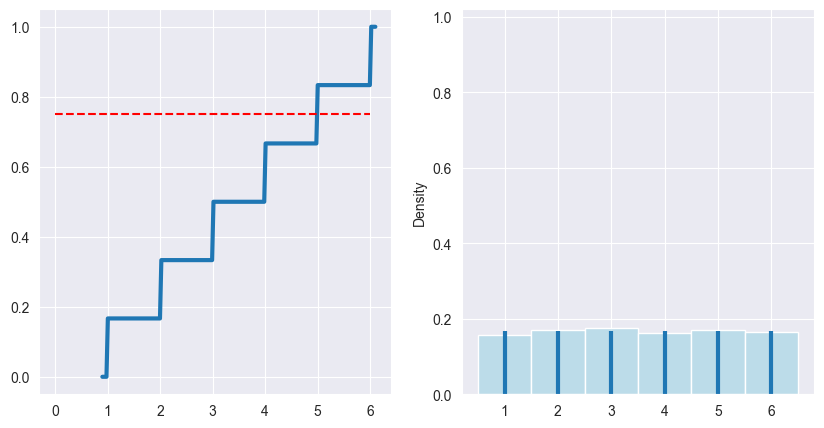

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import randint

x = np.linspace(start=0.9,stop=6.1, num=200)
#Random Variable - Parameter low und high: Werte von low bis zu high
X = randint(low=1,high=7)
#Cumulative Distribution Function
X_cdf = X.cdf(x)
#Probability Mass Function
X_pmf = X.pmf(np.array([1,2,3,4,5,6]))
#
sample = X.rvs(size=5000)

#Percent Point Function: 
print(X.ppf(0.75))
print(X.mean())
print(X.var())
print(X.std())

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
# kumulative Wahrscheinlichkeitsverteilung Plot
ax1 = plt.plot(x,X_cdf,lw=3)
ax1 = plt.hlines(y=0.75,xmin=0,xmax=6,color="red",linestyle="dashed")

ax2 = fig.add_subplot(1,2,2)
ax2 = sns.histplot(sample,bins=np.arange(0.5,7.5),stat="density",color="lightblue")
# Wahrscheinlichkeit für jedes Resultat
ax2 = plt.vlines(np.array([1,2,3,4,5,6]),ymin=0,ymax=X_pmf,lw=3)
ax2 = plt.ylim(0,1.02)
plt.show()

### <span style="color:rgb(160,0,86)">Aufgabe 1</span>
Definieren Sie eine Zufallsvariable $X$, die auf den Werten $2,3,4,5,6,7,8,9$ diskret uniform verteilt ist.
- Zeichen Sie die Wahrscheinlichkeitsverteiung und die kumulative Wahrscheinlichkeitsverteilung.
- Bestimmen Sie die Wahrscheinlichkeit $P(3.5<X\leqslant 6)$.
- Bestimmen Sie den Erwartungswert $\mu$, die Standardabweichung $\sigma$ und das 70\%-Quantil.
- Suchen Sie typische Beispiele für Zufallsvariablen, die diskret uniform verteilt sind.

Probability 3.5 < X >= 6: 43.62%
70% Quartil: 6.0
Standardabweichung: 2.0
Erwartungswert: 5.0


(0.0, 1.0)

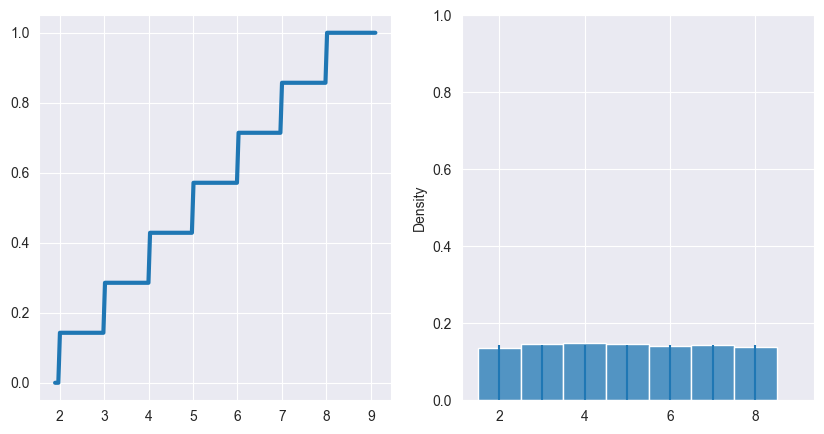

In [53]:
x = np.linspace(start=1.9, stop=9.1, num=200)
X = randint(low=2,high=9)
values = np.array([2, 3, 4, 5, 6, 7, 8, 9])

X_cdf = X.cdf(x)
X_pmf = X.pmf(values)
sample_size = 5000
sample = X.rvs(size=sample_size)

probability = (sum(1 for i in sample if i > 3.5) / sample_size) - (sum(1 for i in sample if i > 6) / sample_size)
print("Probability 3.5 < X >= 6: " + str(round(probability * 100, 2)) + "%") 
print("70% Quartil: " + str(X.ppf(0.7)))
print("Standardabweichung: " + str(X.std()))
print("Erwartungswert: " + str(X.mean()))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(x,X_cdf, lw=3) # lw == linewidth

plt.subplot(1,2,2)
sns.histplot(sample, bins=np.arange(1.5, 9.5), stat="density")
plt.vlines(values, ymin=0, ymax=X_pmf)
plt.ylim(0,1)

### <span style="color:rgb(160,0,86)">Die Bernoulli Verteilung</span>
- Wenn ein *diskrete* Zufallsvariable $X$ **Bernoulli** verteilt ist, schreiben wir $$X\sim \mathsf{Ber}(p)\;.$$

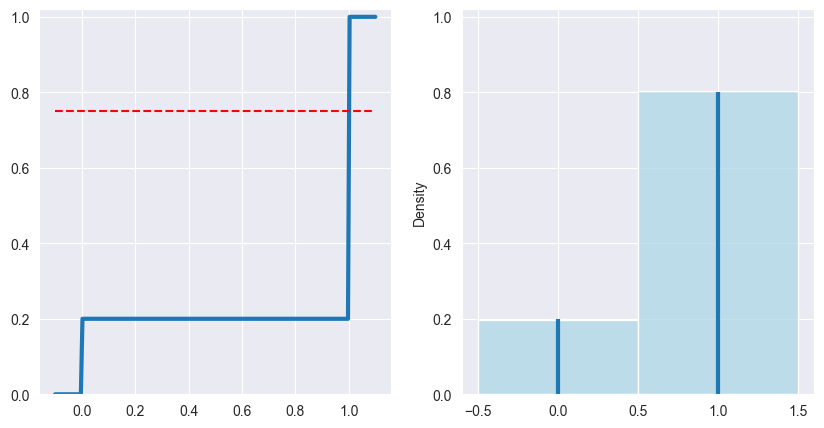

1.0
0.8
0.15999999999999992
0.3999999999999999


In [54]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import bernoulli

x = np.linspace(-0.1,1.1,200)
#Random Variable - Parameter p: Wahrscheinlichkeit für 1
X = bernoulli(p=0.8)
#Cumulative Distribution Function
X_cdf = X.cdf(x)
#Probability Mass Function
X_pmf = X.pmf(np.array([0,1]))
#
sample = X.rvs(size=5000)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = plt.plot(x,X_cdf,lw=3)
ax1 = plt.ylim(0,1.02)
ax1 = plt.hlines(0.75,-0.1,1.1,color="red",linestyle="dashed")
ax2 = fig.add_subplot(1,2,2)
ax2 = sns.histplot(sample,bins=np.arange(-0.5,2.5),stat="density",color="lightblue")
ax2 = plt.vlines(np.array([0,1]),0,X_pmf,lw=3)
ax2 = plt.ylim(0,1.02)
plt.show()
#Percent Point Function: 
print(X.ppf(0.75))
print(X.mean())
print(X.var())
print(X.std())

### <span style="color:rgb(160,0,86)">Aufgabe 2</span>
Definieren Sie eine Zufallsvariable $X$, die mit $p=0.3$ Bernoulli verteilt ist.
- Zeichen Sie die Wahrscheinlichkeitsverteiung und die kumulative Wahrscheinlichkeitsverteilung.
- Bestimmen Sie den Erwartungswert $\mu$, die Standardabweichung $\sigma$ und das 70\%-Quantil.
- Berechnen Sie in Abhängigkeit von $p$ formal den Erwartungswert $\mu$, die Standardabweichung $\sigma$. 
- Suchen Sie typische Beispiele für Zufallsvariablen, die Bernoulli verteilt sind.

Erwartungswert: 0.3
Standardabweichung: 0.458257569495584
70% Quartil: 0.0
Erwartungswert formal: 0.3
Standardabweichung formal: 0.458257569495584


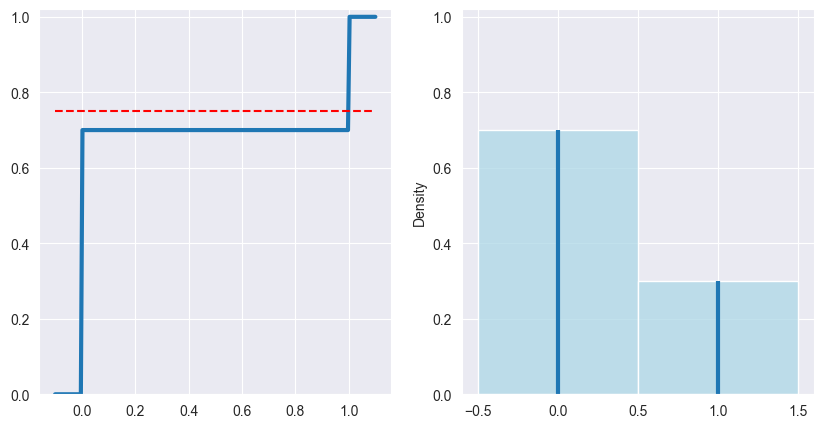

In [66]:
from numpy import sqrt

x = np.linspace(-0.1,1.1,200)
#Random Variable - Parameter p: Wahrscheinlichkeit für 1
p = 0.3
X = bernoulli(p=p)
#Cumulative Distribution Function
X_cdf = X.cdf(x)
#Probability Mass Function
X_pmf = X.pmf(np.array([0,1]))

sample_size = 5000
sample = X.rvs(size=sample_size)

print("Erwartungswert: " + str(X.mean()))
print("Standardabweichung: " + str(X.std()))
print("70% Quartil: " + str(X.ppf(0.7)))

print("Erwartungswert formal: " + str(sample_size * p / sample_size))
print("Standardabweichung formal: " + str(sqrt((sample_size * p * (1-p)) / sample_size)))

fig = plt.figure(figsize=(10,5))

fig.add_subplot(1,2,1)
plt.plot(x,X_cdf,lw=3)
plt.ylim(0,1.02)
plt.hlines(0.75,-0.1,1.1,color="red",linestyle="dashed")

fig.add_subplot(1,2,2)
sns.histplot(sample,bins=np.arange(-0.5,2.5),stat="density",color="lightblue")
plt.vlines(np.array([0,1]),0,X_pmf,lw=3)
plt.ylim(0,1.02)
plt.show()

### <span style="color:rgb(160,0,86)">Die Binomial Verteilung</span>
- Wenn ein *diskrete* Zufallsvariable $X$ **Binomial** verteilt ist, schreiben wir $$X\sim \mathsf{Bin}(p,n)\;.$$

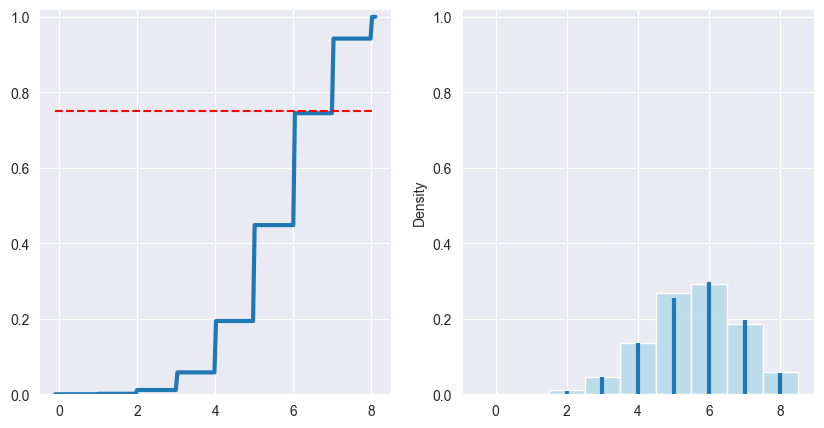

7.0
5.6
1.6800000000000002
1.2961481396815722


In [67]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import binom

x = np.linspace(-0.1,8.1,200)
#Random Variable - Parameter p: Wahrscheinlichkeit für 1
X = binom(p=0.7,n=8)
#Cumulative Distribution Function
X_cdf = X.cdf(x)
#Probability Mass Function
X_pmf = X.pmf(np.array([0,1,2,3,4,5,6,7,8]))

sample = X.rvs(size=5000)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = plt.plot(x,X_cdf,lw=3)
ax1 = plt.ylim(0,1.02)
ax1 = plt.hlines(0.75,-0.1,8.1,color="red",linestyle="dashed")
ax2 = fig.add_subplot(1,2,2)
ax2 = sns.histplot(sample,bins=np.arange(-0.5,9.5),stat="density",color="lightblue")
ax2 = plt.vlines(np.array([0,1,2,3,4,5,6,7,8]),0,X_pmf,lw=3)
ax2 = plt.ylim(0,1.02)
plt.show()
#Percent Point Function: 
print(X.ppf(0.75))
print(X.mean())
print(X.var())
print(X.std())

### <span style="color:rgb(160,0,86)">Aufgabe 3</span>
Definieren Sie eine Zufallsvariable $X$, die mit $p=0.75$ und $n=12$ Binomial verteilt ist.
- Zeichen Sie die Wahrscheinlichkeitsverteiung und die kumulative Wahrscheinlichkeitsverteilung.
- Bestimmen Sie den Erwartungswert $\mu$, die Standardabweichung $\sigma$ und das 70\%-Quantil.
- Wie gross ist die Wahrscheinlichkeit $P(3\leqslant X \leqslant 9)$? 
- Suchen Sie typische Beispiele für Zufallsvariablen, die Binomial verteilt sind.

Erwartungswert: 8.4
Standardabweichung: 1.59
70% Quartil: 9.0
Wahrscheinlichkeit P(3 <= X <= 9): 73.92%


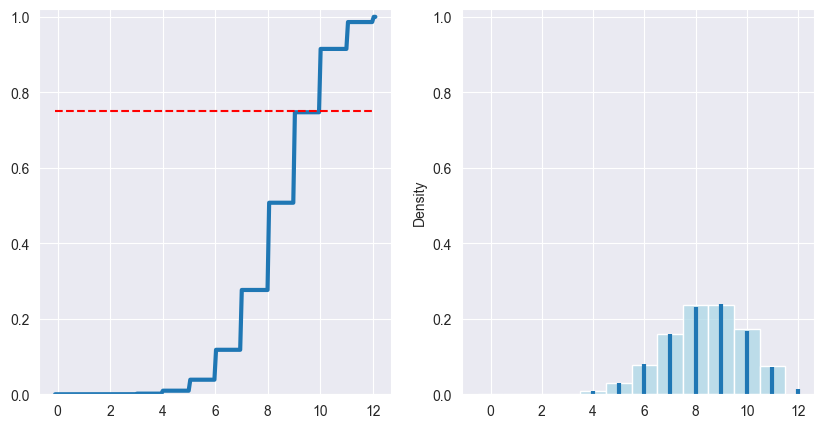

In [75]:
x = np.linspace(-0.1,12.1,200)
#Random Variable - Parameter p: Wahrscheinlichkeit für 1
X = binom(p=0.7,n=12)
#Cumulative Distribution Function
X_cdf = X.cdf(x)
#Probability Mass Function
values = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9 , 10, 11 , 12])
X_pmf = X.pmf(values)
sample_size = 5000
sample = X.rvs(size=sample_size)

print("Erwartungswert: " + str(round(X.mean(), 2)))
print("Standardabweichung: " + str(round(X.std(), 2)))
print("70% Quartil: " + str(X.ppf(0.7)))

probability = (sum(1 for i in sample if i >= 3) / sample_size) - (sum(1 for i in sample if i > 9) / sample_size)
print("Wahrscheinlichkeit P(3 <= X <= 9): " + str(probability * 100) + "%")

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = plt.plot(x,X_cdf,lw=3)
ax1 = plt.ylim(0,1.02)
ax1 = plt.hlines(0.75,-0.1,12.1,color="red",linestyle="dashed")
ax2 = fig.add_subplot(1,2,2)
ax2 = sns.histplot(sample,bins=np.arange(-0.5,12.5),stat="density",color="lightblue")
ax2 = plt.vlines(values,0,X_pmf,lw=3)
ax2 = plt.ylim(0,1.02)
plt.show()

### <span style="color:rgb(160,0,86)">Die Poisson Verteilung</span>
- Wenn ein *diskrete* Zufallsvariable $X$ **Poisson** verteilt ist, schreiben wir $$X\sim \mathsf{Poi}(\mu)\;.$$

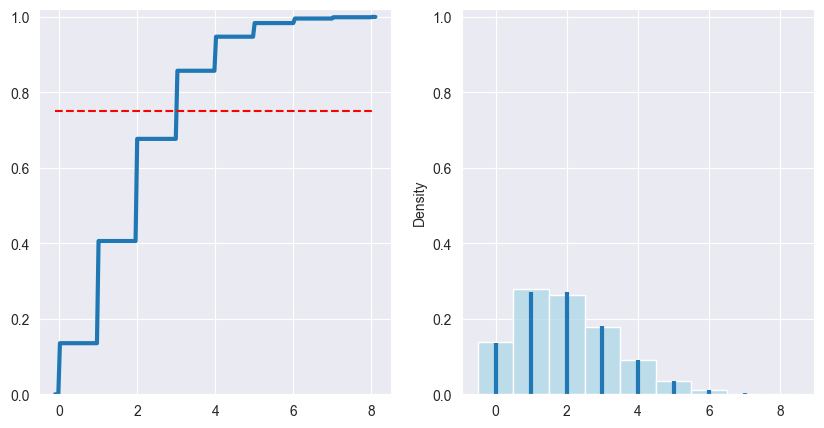

3.0
2.0
2.0
1.4142135623730951


In [76]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import poisson

x = np.linspace(-0.1,8.1,200)
#Random Variable - Parameter mu: Erwartungswert
X = poisson(mu=2)
#Cumulative Distribution Function
X_cdf = X.cdf(x)
#Probability Mass Function
X_pmf = X.pmf(np.array([0,1,2,3,4,5,6,7,8]))
#
sample = X.rvs(size=5000)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = plt.plot(x,X_cdf,lw=3)
ax1 = plt.ylim(0,1.02)
ax1 = plt.hlines(0.75,-0.1,8.1,color="red",linestyle="dashed")
ax2 = fig.add_subplot(1,2,2)
ax2 = sns.histplot(sample,bins=np.arange(-0.5,9.5),stat="density",color="lightblue")
ax2 = plt.vlines(np.array([0,1,2,3,4,5,6,7,8]),0,X_pmf,lw=3)
ax2 = plt.ylim(0,1.02)
plt.show()
#Percent Point Function: 
print(X.ppf(0.75))
print(X.mean())
print(X.var())
print(X.std())

### <span style="color:rgb(160,0,86)">Aufgabe 4</span>
Definieren Sie eine Zufallsvariable $X$, die mit $\mu=4.25$ Poisson verteilt ist.
- Zeichen Sie die Wahrscheinlichkeitsverteiung und die kumulative Wahrscheinlichkeitsverteilung.
- Bestimmen Sie den Erwartungswert $\mu$, die Standardabweichung $\sigma$ und das 70\%-Quantil.
- Wie gross ist die Wahrscheinlichkeit $P(X \geqslant 5)$? 
- Suchen Sie typische Beispiele für Zufallsvariablen, die Poisson verteilt sind.

Erwartungswert: 4.25
Standardabweichung: 2.06
70% Quartil: 5.0
Wahrscheinlichkeit P(X >= 5): 41.4%


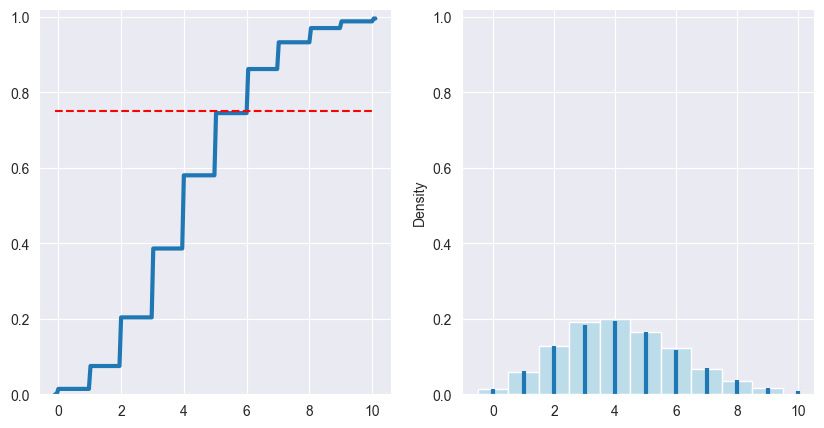

In [82]:
x = np.linspace(-0.1,10.1,200)
#Random Variable - Parameter mu: Erwartungswert
X = poisson(mu=4.25)
#Cumulative Distribution Function
X_cdf = X.cdf(x)
#Probability Mass Function
values = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
X_pmf = X.pmf(values)
sample_size = 5000
sample = X.rvs(size=sample_size)

print("Erwartungswert: " + str(round(X.mean(), 2)))
print("Standardabweichung: " + str(round(X.std(), 2)))
print("70% Quartil: " + str(X.ppf(0.7)))

probability = (sum(1 for i in sample if i >= 5) / sample_size)
print("Wahrscheinlichkeit P(X >= 5): " + str(probability * 100) + "%")

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = plt.plot(x,X_cdf,lw=3)
ax1 = plt.ylim(0,1.02)
ax1 = plt.hlines(0.75,-0.1,10.1,color="red",linestyle="dashed")

ax2 = fig.add_subplot(1,2,2)
ax2 = sns.histplot(sample,bins=np.arange(-0.5,10.5),stat="density",color="lightblue")
ax2 = plt.vlines(values,0,X_pmf,lw=3)
ax2 = plt.ylim(0,1.02)
plt.show()

### <span style="color:rgb(160,0,86)">Die Hypergeometrische Verteilung</span>
- Wenn ein *diskrete* Zufallsvariable $X$ **Hypergeometrisch** verteilt ist, schreiben wir $$X\sim \mathsf{HypG}(M,n,N)\;.$$

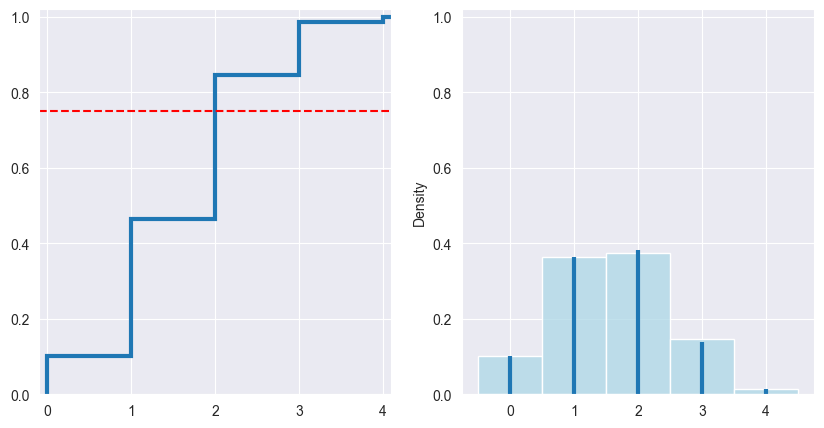

2.0
1.6
0.8084210526315789
0.8991223791184262


In [83]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import hypergeom

x = np.arange(0,5)
#Random Variable - Parameter M, n und N: n von M Kugeln, mit N von der Sorte 1
X = hypergeom(M=20,n=4,N=8)
#Cumulative Distribution Function
X_cdf = X.cdf(x)
#Probability Mass Function
X_pmf = X.pmf(np.array([0,1,2,3,4]))

sample = X.rvs(size=5000)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = plt.stairs(X_cdf,orientation="vertical",lw=3)
ax1 = plt.ylim(0,1.02)
ax1 = plt.xlim(-0.1,4.1)
ax1 = plt.hlines(0.75,-0.1,4.1,color="red",linestyle="dashed")

ax2 = fig.add_subplot(1,2,2)
ax2 = sns.histplot(sample,bins=np.arange(-0.5,5.5),stat="density",color="lightblue")
ax2 = plt.vlines(np.array([0,1,2,3,4]),0,X_pmf,lw=3)
ax2 = plt.ylim(0,1.02)
plt.show()
#Percent Point Function: 
print(X.ppf(0.75))
print(X.mean())
print(X.var())
print(X.std())

### <span style="color:rgb(160,0,86)">Aufgabe 5</span>
Definieren Sie eine Zufallsvariable $X$, die mit $M=50$, $n=6$, $N=30$ Hypergeometrisch verteilt ist.
- Zeichen Sie die Wahrscheinlichkeitsverteiung und die kumulative Wahrscheinlichkeitsverteilung.
- Bestimmen Sie den Erwartungswert $\mu$, die Standardabweichung $\sigma$ und das 70\%-Quantil.
- Wie gross ist die Wahrscheinlichkeit $P(X \leqslant 2)$? 
- Suchen Sie typische Beispiele für Zufallsvariablen, die Hypergeometrisch verteilt sind.

Erwartungswert: 3.6
Standardabweichung: 1.14
70% Quartil: 4.0
Wahrscheinlichkeit P(X <= 2): 16.7%


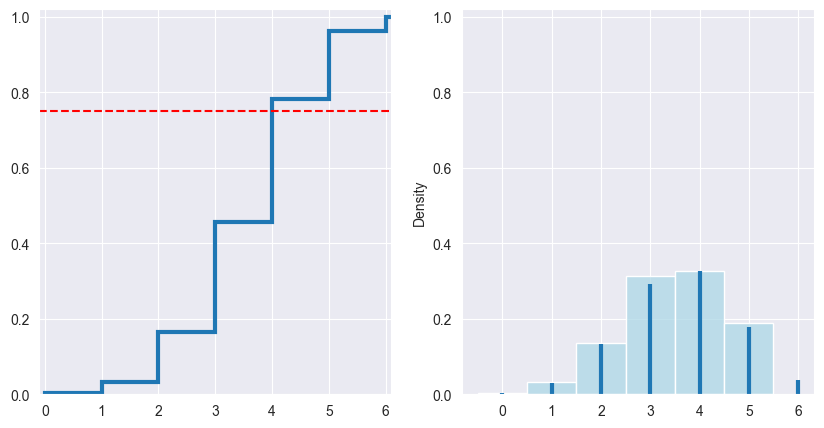

In [86]:
x = np.arange(0,7)
#Random Variable - Parameter M, n und N: n von M Kugeln, mit N von der Sorte 1
X = hypergeom(M=50,n=6,N=30)
#Cumulative Distribution Function
X_cdf = X.cdf(x)
#Probability Mass Function
values = np.array([0, 1, 2, 3, 4, 5, 6])
X_pmf = X.pmf(values)
sample_size = 5000
sample = X.rvs(size=sample_size)

print("Erwartungswert: " + str(round(X.mean(), 2)))
print("Standardabweichung: " + str(round(X.std(), 2)))
print("70% Quartil: " + str(X.ppf(0.7)))

probability = (sum(1 for i in sample if i <= 2) / sample_size)
print("Wahrscheinlichkeit P(X <= 2): " + str(probability * 100) + "%")

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = plt.stairs(X_cdf,orientation="vertical",lw=3)
ax1 = plt.ylim(0,1.02)
ax1 = plt.xlim(-0.1,6.1)
ax1 = plt.hlines(0.75,-0.1,6.1,color="red",linestyle="dashed")

ax2 = fig.add_subplot(1,2,2)
ax2 = sns.histplot(sample,bins=np.arange(-0.5,6.5),stat="density",color="lightblue")
ax2 = plt.vlines(values,0,X_pmf,lw=3)
ax2 = plt.ylim(0,1.02)
plt.show()

### <span style="color:rgb(160,0,86)">Die stetige uniforme Verteilung</span>
- Wenn ein Zufallsvariable $X$ **stetig uniform** verteilt ist, schreiben wir $$X\sim \mathsf{Uni}(\text{loc},\text{scale})\;.$$

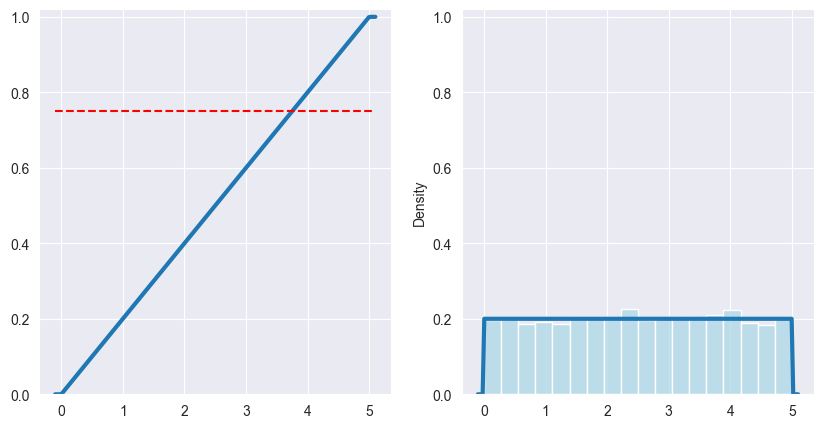

3.75
2.5
2.083333333333333
1.4433756729740643


In [87]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import uniform

x = np.linspace(-0.1,5.1,200)
#Random Variable - Parameter loc und scale: von loc bis loc + scale
X = uniform(loc=0,scale=5)
#Cumulative Distribution Function
X_cdf = X.cdf(x)
#Probability Density Function
X_pdf = X.pdf(x)
#
sample = X.rvs(size=5000)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = plt.plot(x,X_cdf,lw=3)
ax1 = plt.ylim(0,1.02)
ax1 = plt.hlines(0.75,-0.1,5.1,color="red",linestyle="dashed")
ax2 = fig.add_subplot(1,2,2)
ax2 = sns.histplot(sample,stat="density",color="lightblue")
ax2 = plt.plot(x,X_pdf,lw=3)
ax2 = plt.ylim(0,1.02)
plt.show()
#Percent Point Function: 
print(X.ppf(0.75))
print(X.mean())
print(X.var())
print(X.std())

### <span style="color:rgb(160,0,86)">Aufgabe 6</span>
Definieren Sie eine Zufallsvariable $X$, die auf dem Intervall $[3,7]$ stetig uniform verteilt ist.
- Zeichen Sie die Wahrscheinlichkeitsverteiung und die kumulative Wahrscheinlichkeitsverteilung.
- Bestimmen Sie den Erwartungswert $\mu$, die Standardabweichung $\sigma$ und das 70\%-Quantil.
- Wie gross ist die Wahrscheinlichkeit $P(X \leqslant 4.33)$? 
- Suchen Sie typische Beispiele für Zufallsvariablen, die stetig uniform verteilt sind.

Erwartungswert: 5.0
Standardabweichung: 1.15
70% Quartil: 5.8
Wahrscheinlichkeit P(X <= 4.33): 33.98%


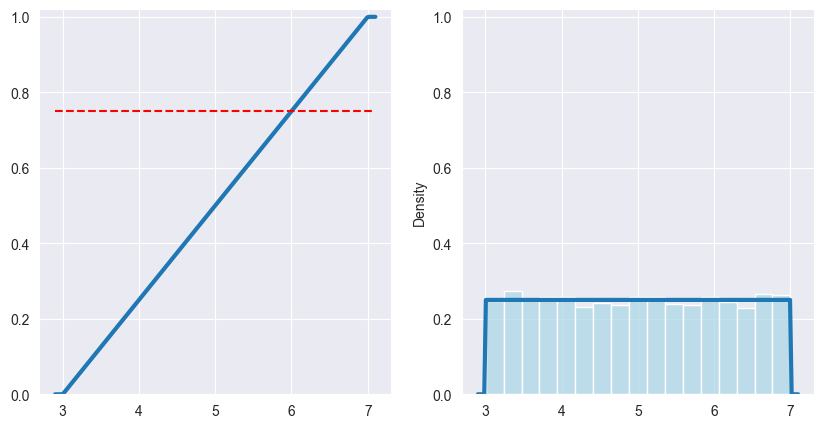

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import uniform

x = np.linspace(2.9,7.1,200)
#Random Variable - Parameter loc und scale: von loc bis loc + scale
X = uniform(loc=3,scale=4)
#Cumulative Distribution Function
X_cdf = X.cdf(x)
#Probability Density Function
X_pdf = X.pdf(x)

sample_size = 5000
sample = X.rvs(size=sample_size)

print("Erwartungswert: " + str(round(X.mean(), 2)))
print("Standardabweichung: " + str(round(X.std(), 2)))
print("70% Quartil: " + str(X.ppf(0.7)))

probability = (sum(1 for i in sample if i <= 4.33) / sample_size)
print("Wahrscheinlichkeit P(X <= 4.33): " + str(probability * 100) + "%")

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = plt.plot(x,X_cdf,lw=3)
ax1 = plt.ylim(0,1.02)
ax1 = plt.hlines(0.75, 2.9, 7.1,color="red",linestyle="dashed")

ax2 = fig.add_subplot(1,2,2)
ax2 = sns.histplot(sample,stat="density",color="lightblue")
ax2 = plt.plot(x,X_pdf,lw=3)
ax2 = plt.ylim(0,1.02)
plt.show()

### <span style="color:rgb(160,0,86)">Die Exponentialverteilung</span>
- Wenn ein *stetige* Zufallsvariable $X$ **Exponential** verteilt ist, schreiben wir $$X\sim \mathsf{Exp}(\text{loc},\text{scale})\;.$$

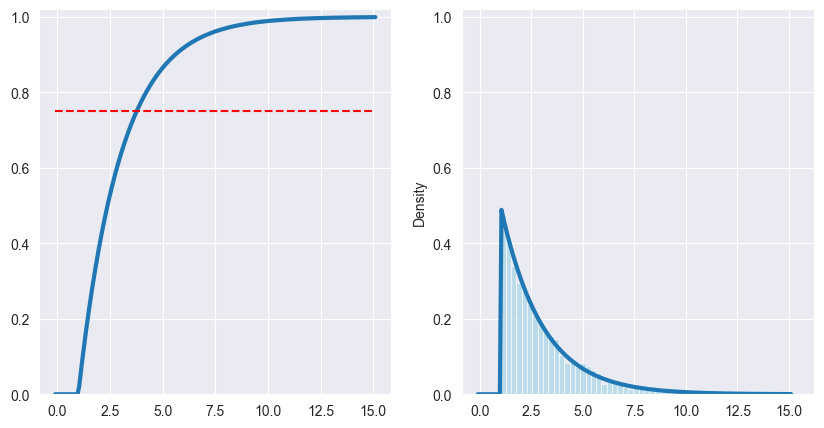

3.772588722239781
3.0
4.0
2.0


In [89]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import expon

x = np.linspace(-0.1,15.1,200)
#Random Variable - Parameter loc und scale: Erwartungswert scale und Startwert loc
X = expon(loc=1,scale=2)
#Cumulative Distribution Function
X_cdf = X.cdf(x)
#Probability Density Function
X_pdf = X.pdf(x)
#
sample = X.rvs(size=5000)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = plt.plot(x,X_cdf,lw=3)
ax1 = plt.ylim(0,1.02)
ax1 = plt.hlines(0.75,-0.1,15.1,color="red",linestyle="dashed")
ax2 = fig.add_subplot(1,2,2)
ax2 = sns.histplot(sample,stat="density",color="lightblue")
ax2 = plt.plot(x,X_pdf,lw=3)
ax2 = plt.ylim(0,1.02)
plt.show()
#Percent Point Function: 
print(X.ppf(0.75))
print(X.mean())
print(X.var())
print(X.std())

### <span style="color:rgb(160,0,86)">Aufgabe 7</span>
Definieren Sie eine Zufallsvariable $X$, die mit $\text{loc}=2$ und $\text{scale}=5$ Exponential verteilt ist.
- Zeichen Sie die Wahrscheinlichkeitsverteiung und die kumulative Wahrscheinlichkeitsverteilung.
- Bestimmen Sie den Erwartungswert $\mu$, die Standardabweichung $\sigma$ und das 70\%-Quantil.
- Wie gross ist die Wahrscheinlichkeit $P(X \leqslant 6)$? 
- Suchen Sie typische Beispiele für Zufallsvariablen, die stetig uniform verteilt sind.

Erwartungswert: 7.0
Standardabweichung: 5.0
70% Quartil: 8.01986402162968
Wahrscheinlichkeit P(X <= 6): 54.300000000000004%


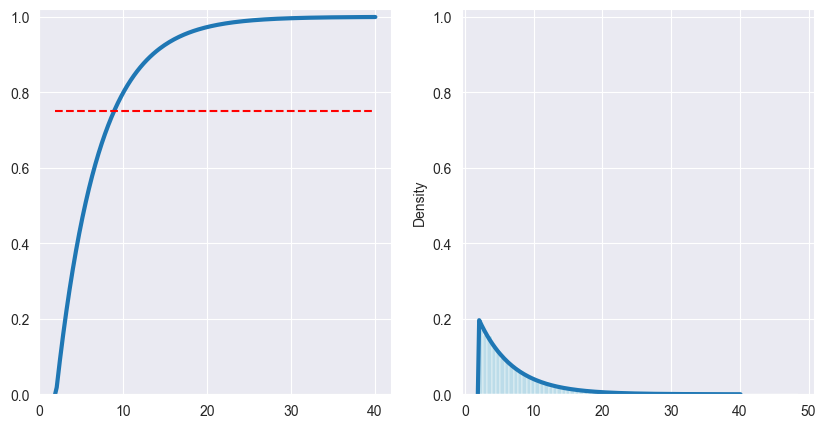

In [90]:
x = np.linspace(1.9,40.1,200)
#Random Variable - Parameter loc und scale: Erwartungswert scale und Startwert loc
X = expon(loc=2,scale=5)
#Cumulative Distribution Function
X_cdf = X.cdf(x)
#Probability Density Function
X_pdf = X.pdf(x)

sample_size = 5000
sample = X.rvs(size=sample_size)

print("Erwartungswert: " + str(round(X.mean(), 2)))
print("Standardabweichung: " + str(round(X.std(), 2)))
print("70% Quartil: " + str(X.ppf(0.7)))

probability = (sum(1 for i in sample if i <= 6) / sample_size)
print("Wahrscheinlichkeit P(X <= 6): " + str(probability * 100) + "%")

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = plt.plot(x,X_cdf,lw=3)
ax1 = plt.ylim(0,1.02)
ax1 = plt.hlines(0.75, 1.9, 40.1,color="red",linestyle="dashed")

ax2 = fig.add_subplot(1,2,2)
ax2 = sns.histplot(sample,stat="density",color="lightblue")
ax2 = plt.plot(x,X_pdf,lw=3)
ax2 = plt.ylim(0,1.02)
plt.show()

### <span style="color:rgb(160,0,86)">Die Normalverteilung</span>
- Wenn ein *stetige* Zufallsvariable $X$ **Normal** verteilt ist, schreiben wir $$X\sim \mathsf{Norm}(\text{loc},\text{scale})\;.$$

4.011734625294123
3.0
2.25
1.5
0.6826894921370859
0.9544997361036416


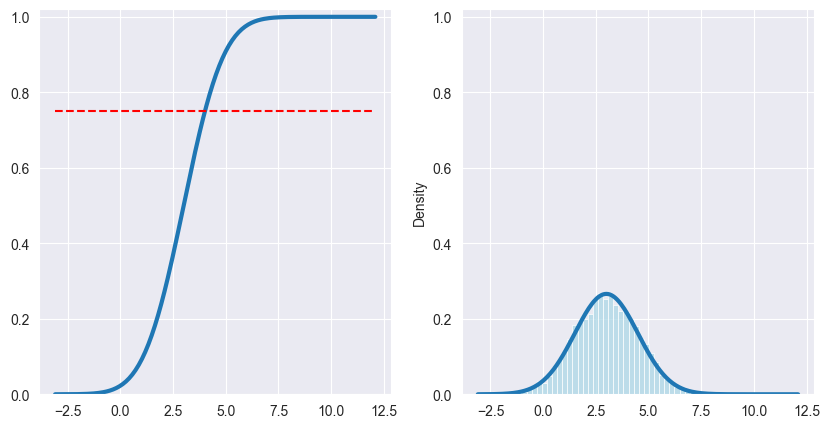

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm

x = np.linspace(-3.1,12.1,200)
#Random Variable - Parameter loc und scale: Erwartungswert loc und Standardabweichung loc
X = norm(loc=3,scale=1.5)
#Cumulative Distribution Function
X_cdf = X.cdf(x)
#Probability Density Function
X_pdf = X.pdf(x)

sample = X.rvs(size=5000)

#Percent Point Function: 
print(X.ppf(0.75))
print(X.mean())
print(X.var())
print(X.std())
print(X.cdf(3+1.5)-X.cdf(3-1.5))
print(X.cdf(3+2*1.5)-X.cdf(3-2*1.5))

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = plt.plot(x,X_cdf,lw=3)
ax1 = plt.ylim(0,1.02)
ax1 = plt.hlines(0.75,-3.1,12.1,color="red",linestyle="dashed")
ax2 = fig.add_subplot(1,2,2)
ax2 = sns.histplot(sample,stat="density",color="lightblue")
ax2 = plt.plot(x,X_pdf,lw=3)
ax2 = plt.ylim(0,1.02)
plt.show()

### <span style="color:rgb(160,0,86)">Aufgabe 8</span>
Definieren Sie eine Zufallsvariable $X$, die mit $\text{loc}=-3$ und $\text{scale}=3.5$ Normal verteilt ist.
- Zeichen Sie die Wahrscheinlichkeitsverteiung und die kumulative Wahrscheinlichkeitsverteilung.
- Sie verändern die Parameter $\text{loc}$ und $\text{scale}$ die Wahrscheinlichkeitsverteilung? 
- Bestimmen Sie den Erwartungswert $\mu$, die Standardabweichung $\sigma$ und das 70\%-Quantil.
- Wie gross ist die Wahrscheinlichkeit $P(-4\leqslant X \leqslant -1)$? 
- Suchen Sie typische Beispiele für Zufallsvariablen, die stetig uniform verteilt sind.

Erwartungswert: -3.0
Standardabweichung: 3.5
70% Quartil: -1.1645982055218576
Wahrscheinlichkeit P(-4 <= X <= -1): 33.92%


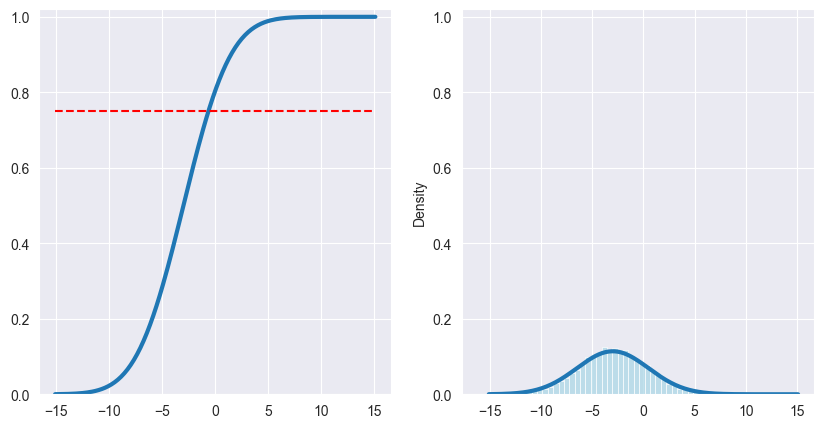

In [102]:
x = np.linspace(-15.1,15.1,200)
#Random Variable - Parameter loc und scale: Erwartungswert loc und Standardabweichung loc
X = norm(loc=-3,scale=3.5)
#Cumulative Distribution Function
X_cdf = X.cdf(x)
#Probability Density Function
X_pdf = X.pdf(x)

sample_size = 5000
sample = X.rvs(size=sample_size)

print("Erwartungswert: " + str(round(X.mean(), 2)))
print("Standardabweichung: " + str(round(X.std(), 2)))
print("70% Quartil: " + str(X.ppf(0.7)))

probability = (sum(1 for i in sample if i >= -4) / sample_size) - (sum(1 for i in sample if i > -1) / sample_size)
print("Wahrscheinlichkeit P(-4 <= X <= -1): " + str(probability * 100) + "%")

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = plt.plot(x,X_cdf,lw=3)
ax1 = plt.ylim(0,1.02)
ax1 = plt.hlines(0.75,-15.1,15.1,color="red",linestyle="dashed")

ax2 = fig.add_subplot(1,2,2)
ax2 = sns.histplot(sample,stat="density",color="lightblue")
ax2 = plt.plot(x,X_pdf,lw=3)
ax2 = plt.ylim(0,1.02)
plt.show()

![HSLU](Bilder/LogoHSLU.png)